In [1]:
import pandas as pd

In [2]:
file_data = pd.read_csv("./data_comment.csv")

In [3]:
file_data

,房客评价
0,房间很好，房东很热情！做饭很方便～+ 说实话，价不配房。这个价钱完全可以住更好的酒店，线上...
1,不错不错挺好的+ 地铁口出门就到，交通很方便，周边超市、餐厅很多，超赞的住宿体验！+ 地铁...
2,房间可以但是没有图片那么大实际算小的，不愉快的就是为了想住的那间来的却没住到，店家也没有提...
3,挺不错的地方+ 可以烧烤，娱乐设施齐全，台球，乒乓球，两台自动麻将机，居然还有KTV，同事...
4,很干净，很舒服！+ 老板人很好。房间也可以性价比高+ 环境很棒，出门就有公交，交通挺方便的...
...,...
688,房子真的挺好的，也很干净，房主也特别热心，特别耐心，下次来邯郸，还会租这个房子+ 环境不错...
689,环境不差，干净卫生
690,非常不错！
691,地铁交通便利# 可以做饭# 房东服务周到# 干净卫生# 设施齐全# + 房东服务...


In [4]:
file_data.drop_duplicates()   #去重

,房客评价
0,房间很好，房东很热情！做饭很方便～+ 说实话，价不配房。这个价钱完全可以住更好的酒店，线上...
1,不错不错挺好的+ 地铁口出门就到，交通很方便，周边超市、餐厅很多，超赞的住宿体验！+ 地铁...
2,房间可以但是没有图片那么大实际算小的，不愉快的就是为了想住的那间来的却没住到，店家也没有提...
3,挺不错的地方+ 可以烧烤，娱乐设施齐全，台球，乒乓球，两台自动麻将机，居然还有KTV，同事...
4,很干净，很舒服！+ 老板人很好。房间也可以性价比高+ 环境很棒，出门就有公交，交通挺方便的...
...,...
688,房子真的挺好的，也很干净，房主也特别热心，特别耐心，下次来邯郸，还会租这个房子+ 环境不错...
689,环境不差，干净卫生
690,非常不错！
691,地铁交通便利# 可以做饭# 房东服务周到# 干净卫生# 设施齐全# + 房东服务...


In [5]:
#使用精准划分方式
import jieba
cut_words = jieba.lcut(str(file_data["房客评价"].values),cut_all=False)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jia\AppData\Local\Temp\jieba.cache
Loading model cost 0.454 seconds.
Prefix dict has been built successfully.


In [6]:
cut_words

['[',
 "'",
 ' ',
 '房间',
 '很',
 '好',
 '，',
 '房东',
 '很',
 '热情',
 '！',
 '做饭',
 '很',
 '方便',
 '～',
 '+',
 ' ',
 '说实话',
 '，',
 '价',
 '不配',
 '房',
 '。',
 '这个',
 '价钱',
 '完全',
 '可以',
 '住',
 '更好',
 '的',
 '酒店',
 '，',
 '线上',
 '服务',
 '很',
 '客气',
 '，',
 '线下',
 '就',
 '一副',
 '欠',
 '他',
 '钱',
 '的',
 '态度',
 '。',
 '不',
 '提供',
 '卫生纸',
 '，',
 '一次性',
 '拖鞋',
 '都',
 '得',
 '要',
 '了',
 '才',
 '给',
 '，',
 '建议',
 '谨慎',
 '选择',
 '。',
 '+',
 ' ',
 '房间',
 '很漂亮',
 '，',
 '住宿',
 '做饭',
 '都',
 '很',
 '方便',
 '，',
 '缺',
 '东西',
 '联系',
 '管家',
 '之后',
 '就',
 '马上',
 '给',
 '我们',
 '送',
 '，',
 '下次',
 '还会',
 '再',
 '来',
 '！',
 '+',
 ' ',
 '房间',
 '特别',
 '好',
 ' ',
 '做饭',
 '很',
 '方便',
 ' ',
 '吃火锅',
 '房东',
 '还',
 '送来',
 '锅',
 '，',
 '插板',
 '，',
 '油',
 '，',
 '糖',
 '。',
 '很',
 '卫生',
 '，',
 '很',
 '干净',
 ' ',
 '这',
 '也',
 '挺',
 '漂亮',
 '，',
 '地方',
 '也',
 '大',
 '。',
 '落地窗',
 '看',
 '外面',
 '很',
 '好看',
 '+',
 ' ',
 '环境',
 '很',
 '好',
 '～',
 '空调',
 '也',
 '很',
 '舒服',
 '，',
 '还',
 '可以',
 '看',
 '电影',
 '电视剧',
 '啥',
 '的',
 '都',
 '可',
 '方便',
 '啦',
 '～',
 '

In [16]:
#加载停用词列表
with open('./stopwords.txt',encoding='UTF-8') as f:
    stop_words = f.read()
    
new_data = []
for word in cut_words:
    if word not in stop_words:
        new_data.append(word)
new_dat

['房间',
 '房东',
 '热情',
 '做饭',
 '方便',
 '说实话',
 '价',
 '不配',
 '价钱',
 '完全',
 '更好',
 '酒店',
 '线上',
 '服务',
 '客气',
 '线下',
 '一副',
 '欠',
 '钱',
 '态度',
 '提供',
 '卫生纸',
 '一次性',
 '拖鞋',
 '才',
 '建议',
 '谨慎',
 '选择',
 '房间',
 '很漂亮',
 '住宿',
 '做饭',
 '方便',
 '缺',
 '东西',
 '联系',
 '管家',
 '之后',
 '马上',
 '送',
 '下次',
 '还会',
 '房间',
 '特别',
 '做饭',
 '方便',
 '吃火锅',
 '房东',
 '送来',
 '锅',
 '插板',
 '油',
 '糖',
 '卫生',
 '干净',
 '漂亮',
 '地方',
 '大',
 '落地窗',
 '外面',
 '好看',
 '环境',
 '空调',
 '舒服',
 '电影',
 '电视剧',
 '方便',
 '下楼',
 '吃饭',
 '逛一逛',
 '下次',
 '还会来',
 '周边',
 '配套',
 '设施',
 '简直',
 '太',
 '全面',
 '房间',
 '整体',
 '不错',
 '保守',
 '估计',
 '睡',
 '六个',
 '没',
 '问题',
 '朋友',
 '小聚',
 '一起',
 '喝点',
 '酒',
 '吃',
 '完',
 '睡',
 '楼下',
 '出了门',
 '24',
 '小时',
 '商店',
 '简直',
 '不要',
 '太',
 '方便',
 '环境',
 '没得',
 '挑',
 '小两口',
 '一套',
 'loft',
 '简直',
 '太',
 '美好',
 '不错',
 '不错',
 '地铁口',
 '出门',
 '交通',
 '方便',
 '周边',
 '超市',
 '餐厅',
 '很多',
 '超赞',
 '住宿',
 '体验',
 '地铁',
 '交通',
 '便利',
 '干净',
 '卫生',
 '停车',
 '方便',
 '干净',
 '卫生',
 '房东',
 '服务周到',
 '小区',
 '环境',
 '下次',
 '二次',
 '入住',
 '地铁',
 '超

In [22]:
#词频统计
from nltk import *
freq_list = FreqDist(new_data)
most_common_words = freq_list.most_common()
most_common_words

[('房东', 897),
 ('干净', 832),
 ('房间', 522),
 ('方便', 500),
 ('不错', 390),
 ('卫生', 324),
 ('齐全', 269),
 ('热情', 265),
 ('特别', 264),
 ('设施', 262),
 ('环境', 260),
 ('满意', 223),
 ('交通', 196),
 ('做饭', 193),
 ('服务周到', 192),
 ('下次', 190),
 ('性价比', 182),
 ('整洁', 177),
 ('高', 166),
 ('舒服', 159),
 ('停车', 158),
 ('感觉', 154),
 ('小区', 151),
 ('入住', 147),
 ('便利', 139),
 ('推荐', 133),
 ('体验', 123),
 ('比较', 114),
 ('老板', 113),
 ('近', 112),
 ('一次', 111),
 ('舒适', 105),
 ('温馨', 99),
 ('海边', 96),
 ('地铁', 93),
 ('位置', 90),
 ('民宿', 88),
 ('图片', 83),
 ('真的', 83),
 ('服务', 82),
 ('没有', 81),
 ('装修', 81),
 ('住宿', 80),
 ('喜欢', 79),
 ('超级', 76),
 ('玩', 75),
 ('地方', 74),
 ('很多', 66),
 ('楼下', 65),
 ('安静', 64),
 ('姐姐', 64),
 ('房主', 64),
 ('东西', 63),
 ('大', 61),
 ('带', 61),
 ('好评', 61),
 ('棒', 60),
 ('还会', 59),
 ('吃饭', 59),
 ('买', 59),
 ('孩子', 58),
 ('很大', 58),
 ('适合', 58),
 ('机会', 57),
 ('附近', 57),
 ('没', 56),
 ('景点', 56),
 ('晚上', 55),
 ('宽敞', 55),
 ('以后', 55),
 ('海鲜', 54),
 ('周边', 53),
 ('吃', 53),
 ('选择', 52),
 ('朋友', 49),

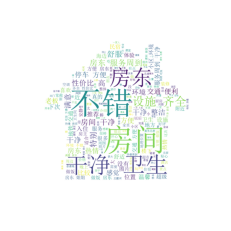

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import PIL.Image as Image
new_mask = np.array(Image.open("房子.jpg"))
cloudobj = WordCloud(font_path = 'simsun.ttc', 
    mask = new_mask, 
    mode = "RGBA", background_color = 'white',).generate(' '.join(new_data))    #自定义背景图片

plt.imshow(cloudobj)
plt.axis("off")
plt.show() 

In [19]:
cloudobj.to_file("词云.png")   #保存词云